In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [18]:
def add_graph_parametrs(fig_size_x = 10, figsize_y = 10, #размеры окна с графиком
                    left_border = -10, right_border = 10, #границы, в которых показывается график по оси абсцисс
                    lower_border = -10, upper_border = 10 #границы, в которых показывается график по оси ординат
                   ):
    plt.figure(figsize=(fig_size_x, figsize_y))
    axes = plt.gca()
    axes.set_xlim([left_border, right_border])
    axes.set_ylim([lower_border, upper_border])
    plt.grid()
    plt.xlabel(r'x')
    plt.ylabel(r'y', rotation='horizontal')

In [19]:
def add_arrow(line, direction='right', size=15, color=None):
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()
    #print (len(xdata), len(ydata))
    
    vect1 = list([xdata[0] - xdata[-1], ydata[0] - ydata[-1]])
    #print(vect1[0], vect1[1])
    mid = list([(xdata[0] + xdata[-1]) / 2, (ydata[0] + ydata[-1]) / 2])
    #print(mid[0], mid[1])
    min_diff = -1;
    min_pos = -1;
    for pos in range(0, len(xdata)):
        vect2 = list([xdata[pos] - mid[0], ydata[pos] - mid[1]])
        diff = abs(vect1[0] * vect2[0] + vect1[1] * vect2[1])
        if (diff < min_diff or min_diff == -1):
            min_pos = pos
            min_diff = diff
            
    pos = min_pos
   
   
    start_ind = pos
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1
    
    vect = list([xdata[end_ind] - xdata[start_ind], ydata[end_ind] - ydata[start_ind]])
    vlen = np.sqrt(vect[0] ** 2 + vect[1] ** 2)
    
    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[start_ind] + vect[0] * vlen / 100, ydata[start_ind] + vect[1] * vlen / 100),
        arrowprops=dict(color=color, headwidth = 8, headlength = 8),
        size=size
    )

In [20]:
def extract_data(file_name):
    data_text = open(file_name, 'r')
    data_list = []
    line = data_text.readline()
    line_data = list(map(int, line.split()))
    number_of_portraits = line_data[0]
    for i in range(0, number_of_portraits):
        line = data_text.readline()
        line_data = list(map(int, line.split()))
        number_of_dots = line_data[0]
        portrait = []
        for j in range(0, number_of_dots):
            line = data_text.readline()
            line_data = list(map(float, line.split()))
            portrait.append(line_data)
        data_list.append(np.array(portrait))
    return data_list

In [21]:
data_list = extract_data('/home/viacheslav/progs/solvers/HW3.txt')

In [22]:
sep_list = extract_data('/home/viacheslav/progs/solvers/HW3_separat.txt')

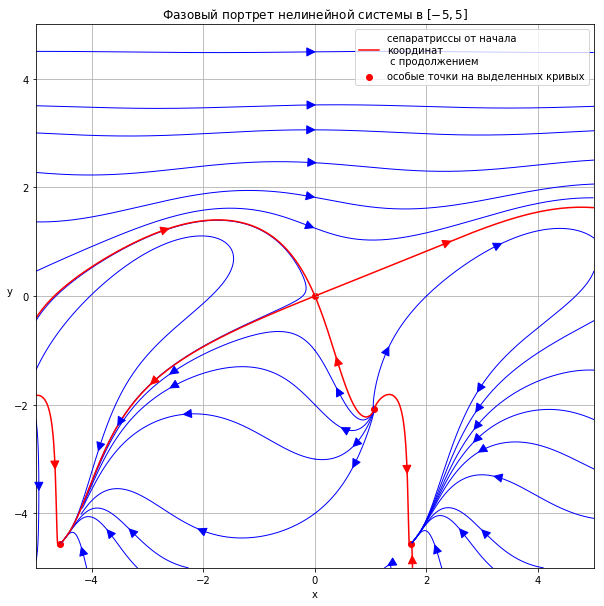

In [23]:
add_graph_parametrs(10,10, -5, 5, -5, 5)
for i in range(0, len(data_list)):
    line = plt.plot(data_list[i][:, 0], data_list[i][:, 1], linewidth = 1, color='b')[0]
    add_arrow(line)
for i in range(0, len(sep_list)):
    if (i == 0 or i == 3):
        sep_list[i] = (sep_list[i])[::-1]
        if (i == 0):
            k = 0
            while (sep_list[0][k, 0] > 1.715337):
                k += 1
            y = sep_list[i][:k]
            while (sep_list[0][k, 0] > 1.050015):
                k += 1
            z = sep_list[i][len(y):k]
            u = sep_list[i][k:]
            line = plt.plot(y[:, 0], y[:, 1], linewidth=1.5, color='r')[0]
            add_arrow(line)
            line = plt.plot(z[:, 0], z[:, 1], linewidth=1.5, color='r', label='сепаратриссы от начала\nкоординат\n c продолжением')[0]
            add_arrow(line, direction='left')
            line = plt.plot(u[:, 0], u[:, 1], linewidth=1.5, color='r')[0]
            add_arrow(line)
        else:
            line = plt.plot(sep_list[i][:, 0], sep_list[i][:, 1], linewidth=1.5, color='r')[0]
            add_arrow(line)
    else:
        if (i == 1):
            k = 0
            while (sep_list[1][k, 0] > -4.567851):
                k += 1
            y = sep_list[i][: k]
            z = sep_list[i][k: ]
            line = plt.plot(y[:, 0], y[:, 1], linewidth=1.5, color='r')[0]
            add_arrow(line)
            line = plt.plot(z[:, 0], z[:, 1], linewidth=1.5, color='r')[0]
            add_arrow(line, direction='left')
        else:
            line = plt.plot(sep_list[i][:, 0], sep_list[i][:, 1], linewidth=1.5, color='r')[0]
            add_arrow(line)
plt.scatter([0, 1.064761, -4.567788, 1.715215], [0, -2.0768312745549, -4.567725, -4.567933], color='r',
             label='особые точки на выделенных кривых')
plt.legend(loc=1)
plt.title(r'Фазовый портрет нелинейной системы в $\left[-5, 5\right]$')
plt.show()

In [24]:
#найдем стремление в обратном времени и пересечение
def unlinode(v, t):
    x = v[0]
    y = v[1]
    dx = np.sin(x) + np.exp(y) - 1
    dy = np.sin(x - y)
    return [dx, dy]

sol1 = odeint(unlinode, [0, 1], np.linspace(0, -50, 10000), ())
sol2 = odeint(unlinode, [5, 1], np.linspace(0, -50, 10000), ())
print('выше:', sol1[-1, 0], sol1[-1, 1])
print('ниже:', sol2[-1, 0], sol2[-1, 1])
print('пресечение с x = 5:', sep_list[2][-1, 1])

выше: -5.218423925980708 -2.0768312693765045
ниже: 1.0647613790626715 -2.0768312745549
пресечение с x = 5: 1.625196
